<a href="https://colab.research.google.com/github/JeremyBKhusial/CUNYAidAccess/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import sklearn.compose as skc
import sklearn.preprocessing as skp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Upload teh dataset wine_data_small.csv to your colab.

Based on the column label decide whether you should model the label based on logistic or linear regression.

1. Train a stats model to predict the label using all the features. Print the summary. Based on the summary, does the probability of your wine (according to the model) being good increases or decreases as the density of the wine increases? How about as the alcohol level increases?

2. Use sklearn for prediciton:

 a. Split your data into trainining (80% of your data) and testing (20%) of your data.

 b. Apply StandardScaler() to the feature columns of the dataset.

 c. Vary the parameter C that defines the logistic regression model in the set np.logspace(-4, 1, 50)

 d. Train your model for each parameter C and evaluate your model on the the train and test datasets by calculatin the accuracy.

 e. Plot the accuracy numbers for your training and test datasets as a function of C. What value of C yields the best accuracy for the train data. How about the best accuracy for the test data?

In [25]:
df= pd.read_csv('wine_data_small.csv')
df.head()
df.describe()
#Seems like logistic regression to predict good/bad wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,9.797268,0.773643,0.786348,31.160946,0.199340,128.291500,228.844238,1.009843,3.159710,1.019918,11.292861
std,2.420729,0.365962,0.384524,19.024067,0.125182,76.896147,100.631783,0.011990,0.172152,0.408048,1.190822
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987420,2.720000,0.250000,8.400000
25%,7.600000,0.420000,0.400000,9.400000,0.071750,45.000000,150.000000,0.997347,3.030000,0.620000,10.400000
50%,10.000000,0.830000,0.850000,37.600000,0.203000,143.800000,240.950000,1.011970,3.150000,1.080000,11.300000
75%,11.725000,1.080000,1.110000,46.700000,0.298000,192.700000,311.525000,1.019690,3.270000,1.360000,12.200000
max,15.900000,1.520000,1.660000,63.800000,0.610000,289.000000,440.000000,1.035520,3.780000,2.000000,14.900000


In [26]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.describe()
# Validating that X.train is 80 percent of the data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000
mean,9.793996,0.774164,0.785579,31.203490,0.199609,128.320000,228.534673,1.009890,3.160491,1.020101,11.298967
std,2.421925,0.366142,0.384489,19.016333,0.125208,76.750168,100.477046,0.011995,0.173230,0.407284,1.184450
min,3.900000,0.090000,0.000000,0.700000,0.012000,1.000000,7.000000,0.987420,2.720000,0.260000,8.400000
25%,7.600000,0.430000,0.400000,9.500000,0.071000,45.000000,150.000000,0.997400,3.030000,0.620000,10.475000
50%,10.000000,0.830000,0.850000,37.550000,0.204000,143.950000,239.450000,1.011970,3.150000,1.070000,11.400000
75%,11.700000,1.080000,1.100000,46.700000,0.298000,192.600000,311.200000,1.019730,3.280000,1.360000,12.200000
max,15.900000,1.500000,1.590000,63.800000,0.610000,289.000000,440.000000,1.035520,3.780000,2.000000,14.900000


In [27]:
scaler = skp.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Using StandardScaler()

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.6059523809523809
0.5970238095238095


In [29]:
C = np.logspace(-4, 1, 50)
accuracy_train = []
accuracy_test = []

for i in C:
    model = LogisticRegression(C=i, max_iter=1000)
    model.fit(X_train, y_train)
    accuracy_train.append(model.score(X_train, y_train))
    accuracy_test.append(model.score(X_test, y_test))

accuracy_train
[0.5772321428571429, 0.5819940476190476, 0.5870535714285714, 0.5897321428571428, 0.5938988095238096, 0.5950892857142858, 0.6007440476190476, 0.6010416666666667, 0.603125, 0.6074404761904761, 0.6074404761904761, 0.6063988095238095, 0.6089285714285714, 0.6095238095238096, 0.609375, 0.6086309523809523, 0.6069940476190476, 0.6053571428571428, 0.6038690476190476, 0.6035714285714285, 0.6050595238095238, 0.6038690476190476, 0.6043154761904762, 0.6049107142857143, 0.6044642857142857, 0.60625, 0.60625, 0.606547619047619, 0.6069940476190476, 0.606845238095238, 0.6063988095238095, 0.6055059523809524, 0.6059523809523809, 0.6058035714285714, 0.6059523809523809, 0.6059523809523809, 0.6058035714285714, 0.6061011904761905, 0.6061011904761905, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809, 0.6059523809523809]
accuracy_test
[0.58809523809

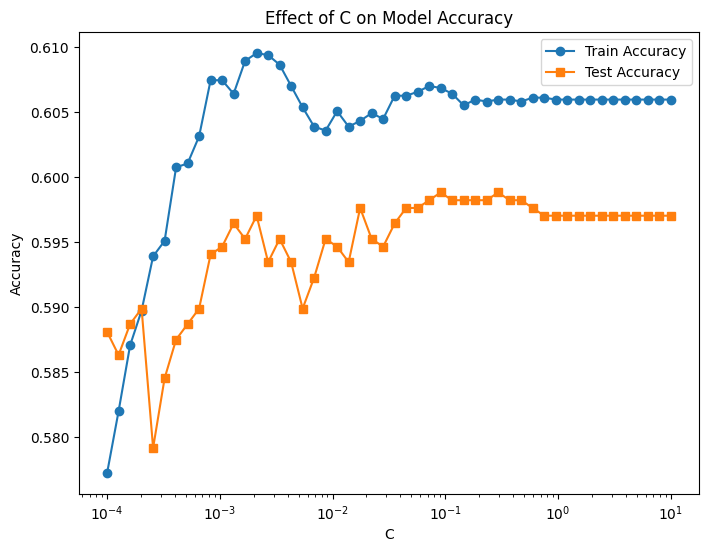

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(C, accuracy_train, label="Train Accuracy", marker='o')
plt.plot(C, accuracy_test, label="Test Accuracy", marker='s')
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Effect of C on Model Accuracy")
plt.legend()
plt.show()

In [31]:
best_C_train = C[np.argmax(accuracy_train)]
best_C_test = C[np.argmax(accuracy_test)]

print(f"Best C for training: {best_C_train}")
print(f"Best C for testing: {best_C_test}")

Best C for training: 0.0021209508879201904
Best C for testing: 0.09102981779915217
